In [2]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [23]:
# Dataset loading from csv

fruits = pd.read_csv('/Users/DRepani/Documents/Datasets/fruits.csv')

In [4]:
fruits.columns

Index(['color', 'sphericity', 'weight', 'label'], dtype='object')

In [24]:
# Separate the features(X) and Target (y)

X = fruits[['sphericity', 'weight']]
y = fruits['label']

In [25]:
# Split the data for training and testing:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
X_train.shape, X_test.shape

((45, 2), (15, 2))

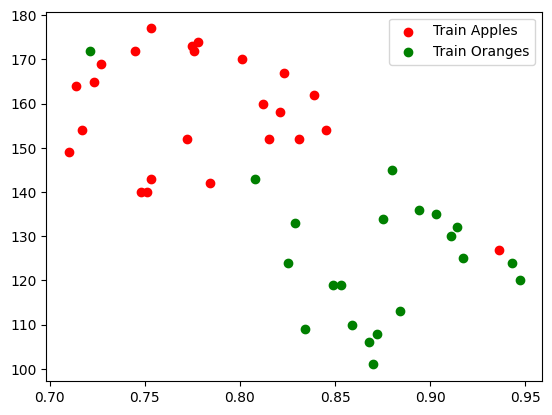

In [26]:
# Training sample and testing sample visualization:

plt.scatter(x = 'sphericity', y = 'weight', data=X_train[y_train=='Apple'], c='red', label='Train Apples')
plt.scatter(x = 'sphericity', y = 'weight', data=X_train[y_train=='Orange'], c='green', label='Train Oranges')
plt.legend()
plt.show()

In [27]:
# Train the model:

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
round(model.score(X_test, y_test), 4)

0.8667

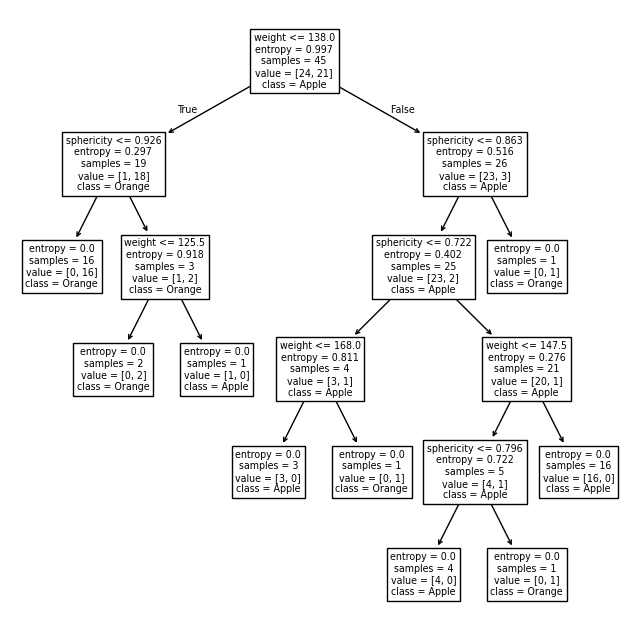

In [31]:
# Tree structure 

plt.figure(figsize=(8,8))

plot_tree(model,feature_names=X.columns, class_names=model.classes_)
plt.show()


In [29]:
# Verifying depth of the tree:

print(f'Tree Depth: {model.get_depth()}')
print(f'Leaf nodes: {model.get_n_leaves()}')

Tree Depth: 5
Leaf nodes: 9


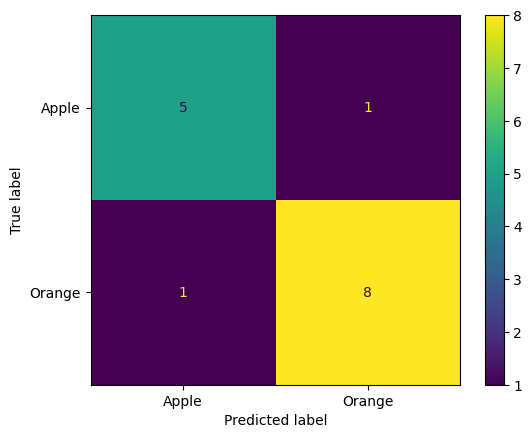

In [30]:
# Verifying with ConfusionMatrix:

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()